In [32]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
# Reading data
df = pd.read_csv('data.csv')

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [36]:
df.shape

(569, 33)

In [37]:
# Checking if there are duplicates somewhere
df['id'].nunique()

569

So there are no duplicates

### Exploring and Cleaning the dataset

In [38]:
# Dropping the following columns:
# id
# diagnosis: as it is a class label; not needed for training
# Unnamed 32: as it contains Nan values
#y = df['diagnosis'] # Storing the class label in y before dropping it
#y.head()

In [39]:
# Dropping columns which we are not going to use 
to_be_dropped = ['Unnamed: 32','id'] #,'diagnosis']
data = df.drop(to_be_dropped, axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [41]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


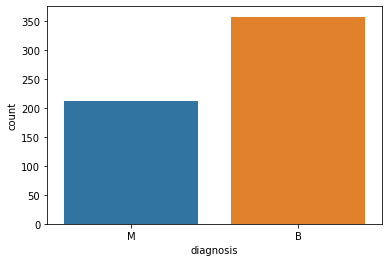

M: 212 B: 357


In [42]:
M = len(data[data["diagnosis"] == "M"])
B = len(data[data["diagnosis"] == "B"])
# Plotting for visualization
ax = sns.countplot(data = data, x = "diagnosis")
plt.show()
print("M:",M,"B:",B)

### Visualization

Text(0.5, 1.0, 'area_mean')

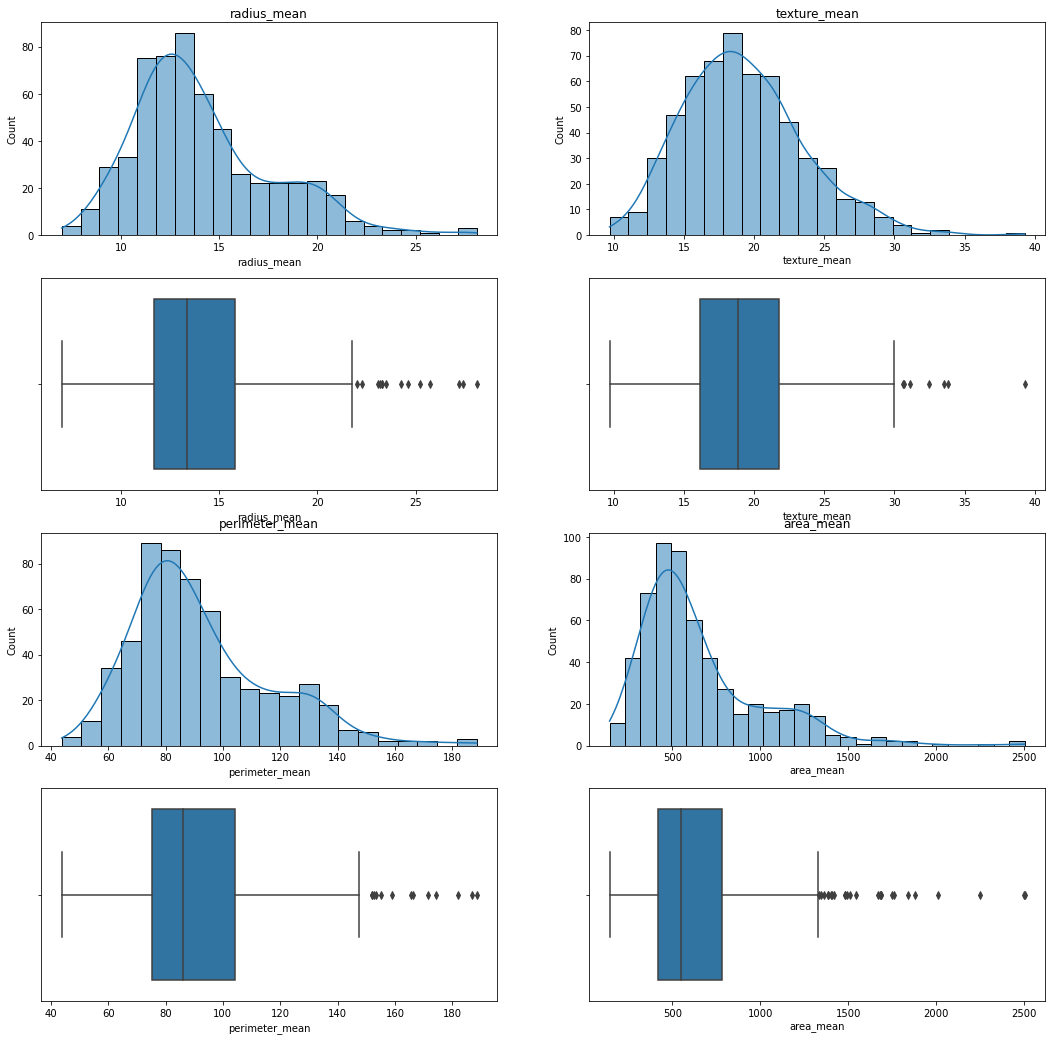

In [43]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4,2, figsize = (18,18))

sns.histplot(data = data, x = "radius_mean", ax = ax1, kde = True)
sns.boxplot(data = data, x = "radius_mean", ax = ax3)
ax1.set_title("radius_mean")
#ax3.set_title("radius_mean")

sns.histplot(data = data, x = "texture_mean", ax = ax2, kde = True)
sns.boxplot(data = data, x = "texture_mean", ax = ax4)
ax2.set_title("texture_mean")
#ax4.set_title("texture_mean")

sns.histplot(data = data, x = "perimeter_mean", ax = ax5, kde = True)
sns.boxplot(data = data, x = "perimeter_mean", ax = ax7)
ax5.set_title("perimeter_mean")
#ax7.set_title("perimeter_mean")

sns.histplot(data = data, x = "area_mean", ax = ax6, kde = True)
sns.boxplot(data = data, x = "area_mean", ax = ax8)
ax6.set_title("area_mean")
#ax8.set_title("area_mean")

We can see the presence of outliers and they can be handeled using IQR.

In [44]:
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c],75)
        IQR = Q3 - Q1
        outlier_step = np.round(IQR * 1.5)
        IQR_min = Q1 - outlier_step
        IQR_max = Q3 + outlier_step
        for i in range(len(data)):
            if data[c][i] >= IQR_max:
                data[c][i] = IQR_max
            if data[c][i] <= IQR_min:
                data[c][i] = IQR_min
    return data

In [45]:
#print(len(detect_outliers(data,data.columns[1:])))
new_data = detect_outliers(data,data.columns[1:])

<ipython-input-44-20a4bdcb3e90>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c][i] = IQR_max
<ipython-input-44-20a4bdcb3e90>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c][i] = IQR_min


Text(0.5, 1.0, 'area_mean')

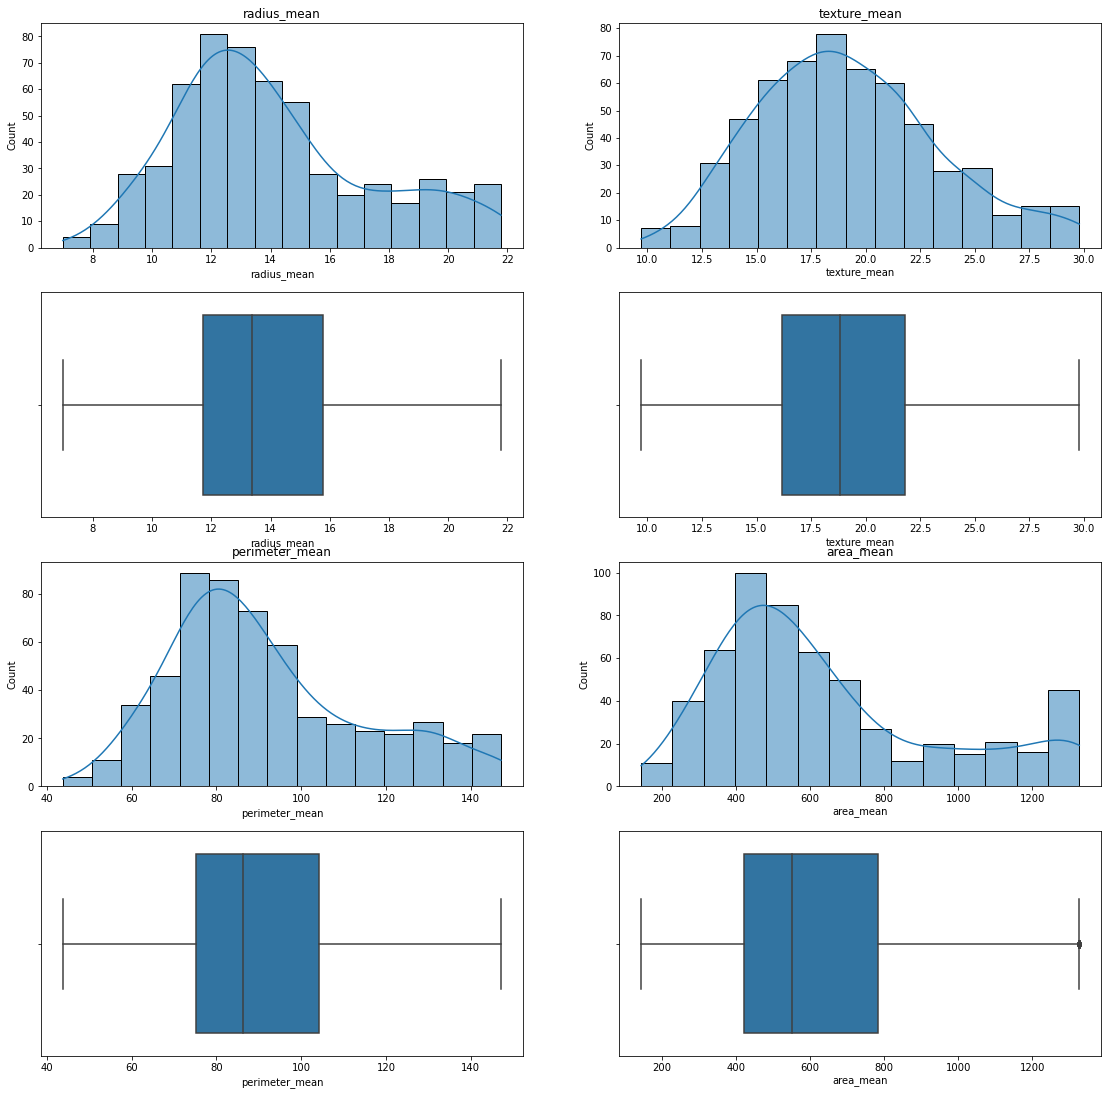

In [46]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4,2, figsize = (19,19))

sns.histplot(data = data, x = "radius_mean", ax = ax1, kde = True)
sns.boxplot(data = data, x = "radius_mean", ax = ax3)
ax1.set_title("radius_mean")
#ax3.set_title("radius_mean")

sns.histplot(data = data, x = "texture_mean", ax = ax2, kde = True)
sns.boxplot(data = data, x = "texture_mean", ax = ax4)
ax2.set_title("texture_mean")
#ax4.set_title("texture_mean")

sns.histplot(data = data, x = "perimeter_mean", ax = ax5, kde = True)
sns.boxplot(data = data, x = "perimeter_mean", ax = ax7)
ax5.set_title("perimeter_mean")
#ax7.set_title("perimeter_mean")

sns.histplot(data = data, x = "area_mean", ax = ax6, kde = True)
sns.boxplot(data = data, x = "area_mean", ax = ax8)
ax6.set_title("area_mean")
#ax8.set_title("area_mean")

As we can see above, Outliers are handeled

Now working on correlation

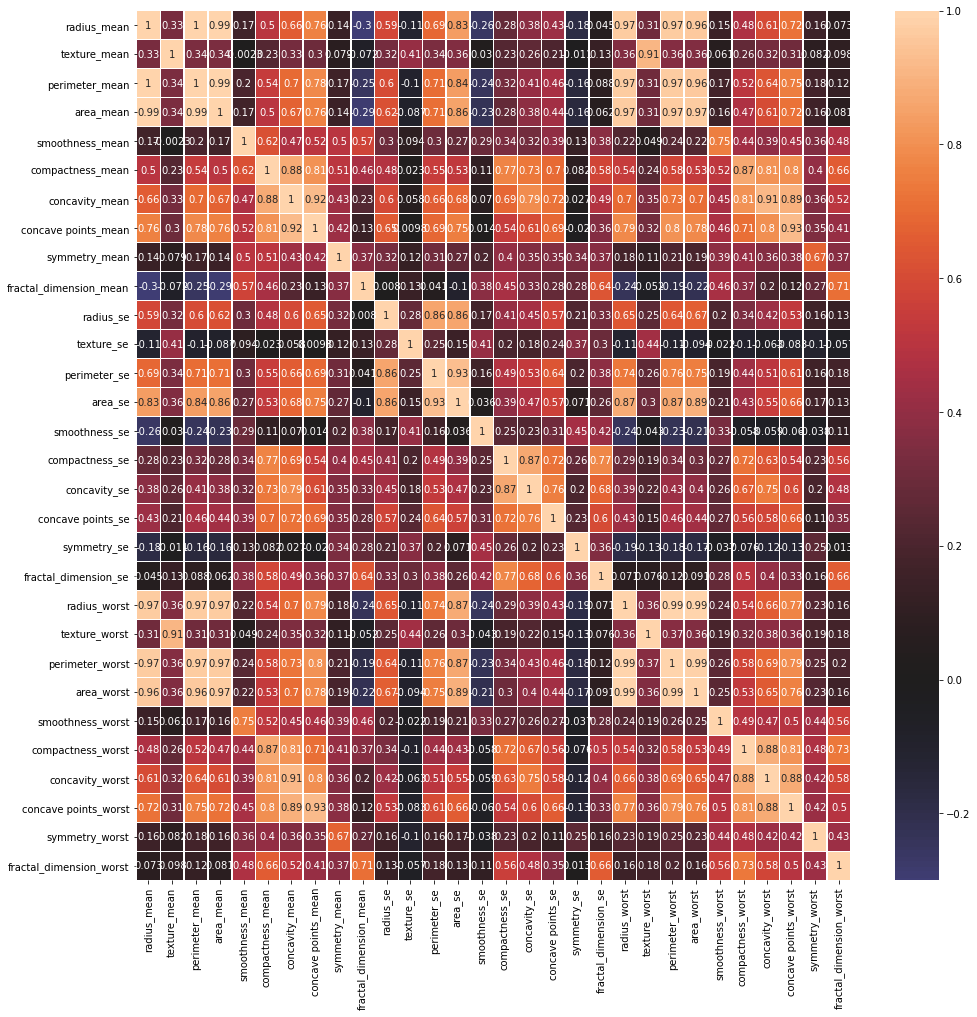

In [47]:
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, ax = ax, center = 0)
plt.show()

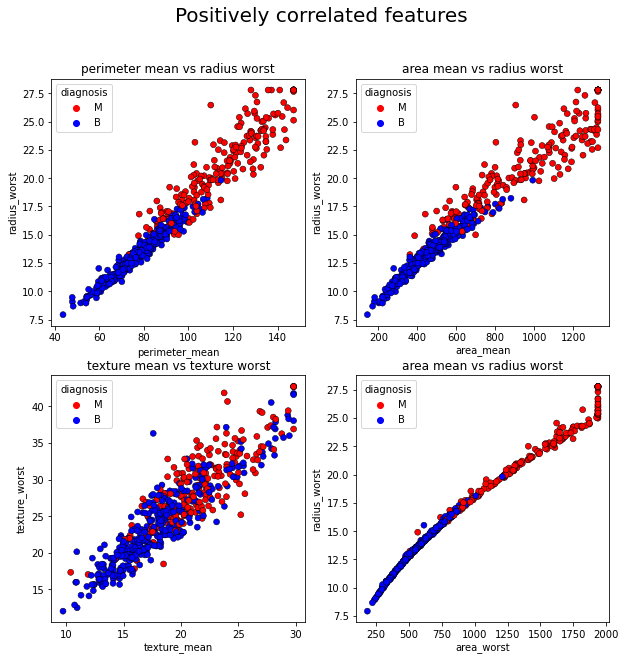

In [48]:
palette ={'B' : 'blue', 'M' : 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = 'diagnosis',
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = 'diagnosis',
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = 'diagnosis',
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = 'diagnosis',
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positively correlated features', fontsize = 20)
plt.show()

Few Features are Highly correlated <br>
From above plots, we dropped following features: "perimeter_mean", "radius_worst", "perimeter_worst", "area_mean","area_worst", "concave points_worst" , "concave points_mean", "concavity_worst", "compactness_mean", "area_se", "texture_worst", "texture_se", "perimeter_se", "concavity_se"

In [49]:
data = data.drop(columns = ["perimeter_mean", "radius_worst", "perimeter_worst", "area_mean","area_worst", "concave points_worst" , "concave points_mean", "concavity_worst", "compactness_mean", "area_se", "texture_worst", "texture_se", "perimeter_se", "concavity_se"])

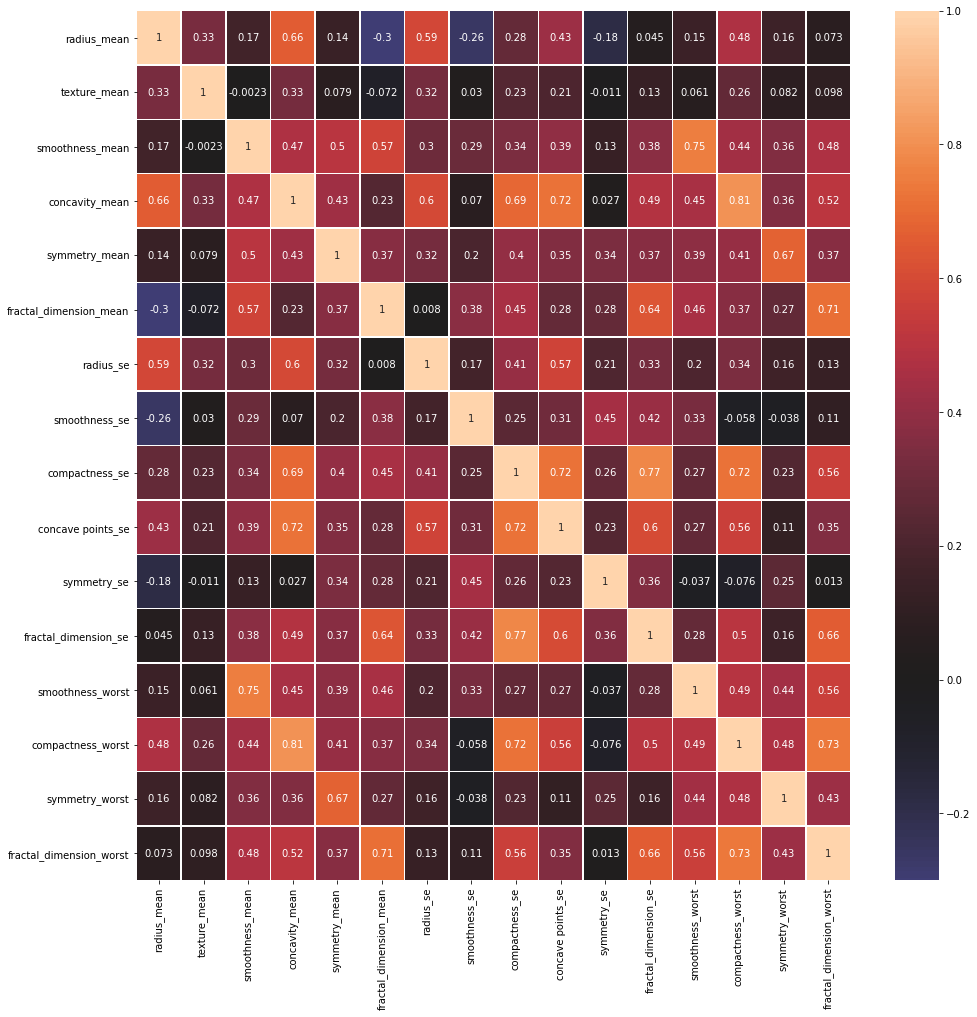

In [50]:
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, ax = ax, center = 0)
plt.show()

Now highly correlated features are removed

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   smoothness_se            569 non-null    float64
 9   compactness_se           569 non-null    float64
 10  concave points_se        569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  smoothness_worst         569 non-null    float64
 14  compactness_worst        5

In [52]:
y = data["diagnosis"].map({'M':1,'B':0})
y = y.to_numpy()
y = y.reshape(len(y),1)

data = data.drop(columns = ["diagnosis"])
data = data.to_numpy()

new_data = np.hstack((data,y))
np.random.shuffle(new_data)

train = new_data[:455]
test = new_data[455:]

N,p = train.shape
Nt,pt = test.shape

print("Train Set:",N,p)
print("Test Set:",Nt,pt)

train_X = train[:,:-1]
train_y = train[:,-1]
train_y = train_y.reshape(N,1)

test_X = test[:,:-1]
test_y = test[:,-1]
test_y = test_y.reshape(Nt,1)

train_X = np.hstack((np.ones((N,1)),train_X))
test_X = np.hstack((np.ones((Nt,1)),test_X))

Train Set: 455 17
Test Set: 114 17


In [53]:
train.dtype

dtype('float64')

### Feature Selection <br>
Normalizing our data points as there is huge diiference among the values of our data points.

In [54]:
# Standardize the dataset
# Store mean and std in a dictionary to use again for test set
mean_and_std = {}
for i in range(1,p):
    mean_and_std["mean"+str(i)] = np.mean(train_X[:,i])
    mean_and_std["std"+str(i)] = np.std(train_X[:,i])

# Now standardizing the training set
for i in range(1,p):
    train_X[:,i] = (train_X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

# Now standardizing the test set
for i in range(1,p):
    test_X[:,i] = (test_X[:,i] - mean_and_std["mean"+str(i)])/mean_and_std["std"+str(i)]

In [55]:
def sigmoid(a):
    return(1/(1+np.exp(-a)))

In [91]:
# Logistic Regression Gradient Descent
# Gradient Descent
iterations = 50
alpha = 0.001

theta = (0.01)*np.random.rand(p)
theta = np.asmatrix(theta).T

h_theta = sigmoid(np.dot(train_X,theta))
cost = []
#iterat = []

for i in range(iterations):
    h_theta = sigmoid(np.dot(train_X,theta))
    grad = np.dot(train_X.T,(h_theta - train_y))
    
    theta = theta - (alpha)*grad
    J = (1/N)*(-np.dot(train_y.T,np.log(h_theta)) - np.dot((1-train_y.T),np.log(1-h_theta)))
    cost.append(J[0,0])
    #iterat.append(i)
    #print(theta,"\t",i)

y_pred = sigmoid(np.dot(train_X,theta))

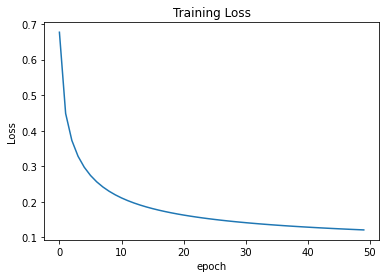

In [92]:
plt.plot(cost)
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.title("Training Loss")
plt.show()

In [93]:
y_pred = np.round(y_pred)

count=0
for i in range(len(train_y)):
    if train_y[i]!=y_pred[i]:
        count=count+1
print("Total ",count," out of",N,"are misclassified giving accuracy of",100*((N-count)/N),"%")

Total  15  out of 455 are misclassified giving accuracy of 96.7032967032967 %


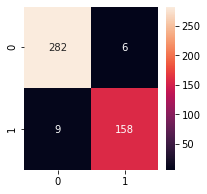

Precision: [0.96907216 0.96341463]
Recall: [0.97916667 0.94610778]
F1 Score: [0.97409326 0.95468278]


In [94]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(train_y, y_pred, labels = [0,1])
#print(cm)

f,ax = plt.subplots(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = "d", ax = ax)
plt.show()


prf = precision_recall_fscore_support(train_y, y_pred, labels = [0,1])
print("Precision:",prf[0])
print("Recall:",prf[1])
print("F1 Score:",prf[2])

In [95]:
# Prediction on test set
y_pred_test = sigmoid(np.dot(test_X,theta))

y_pred_test = np.round(y_pred_test)

count_t=0
for i in range(Nt):
    if test_y[i]!=y_pred_test[i]:
        count_t=count_t+1
print("Total ",count_t," out of",Nt,"are misclassified giving accuracy of",100*((Nt-count_t)/Nt),"%")

Total  6  out of 114 are misclassified giving accuracy of 94.73684210526315 %


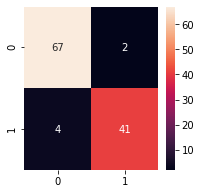

Precision: [0.94366197 0.95348837]
Recall: [0.97101449 0.91111111]
F1 Score: [0.95714286 0.93181818]


In [96]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(test_y, y_pred_test, labels = [0,1])
#print(cm)

f,ax = plt.subplots(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = "d", ax = ax)
plt.show()

prf = precision_recall_fscore_support(test_y, y_pred_test, labels = [0,1])
print("Precision:",prf[0])
print("Recall:",prf[1])
print("F1 Score:",prf[2])

Accuracy is:  96.49122807017544


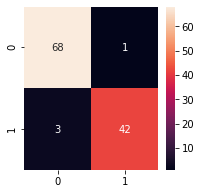

Precision: [0.95774648 0.97674419]
Recall: [0.98550725 0.93333333]
F1 Score: [0.97142857 0.95454545]


In [97]:
# Using Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Random forest classifier with n_estimators=100 
rf = RandomForestClassifier(n_estimators = 100, random_state = 43)      
rf = rf.fit(train_X, train_y.reshape(N,))

ac = accuracy_score(test_y,rf.predict(test_X))
print('Accuracy is: ',ac*100)
cm = confusion_matrix(test_y,rf.predict(test_X))

# Confusion Matrix
f,ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot = True, fmt = "d", ax = ax)
plt.show()
#print("The Confusion Matrix so obtained is: ")
#print(cm)

# Scores
prf = precision_recall_fscore_support(test_y.reshape(Nt,), rf.predict(test_X), labels = [0,1])
print("Precision:",prf[0])
print("Recall:",prf[1])
print("F1 Score:",prf[2])